In [2]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

In [3]:
X.shape

(60, 3)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [5]:
X2D.shape

(60, 2)

In [6]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

In [7]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [8]:
1 - pca.explained_variance_ratio_.sum()

0.09028309326742046

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X_train,y_train = mnist.data[:60000], mnist.target[:60000]
X_test,y_test = mnist.data[60000:], mnist.target[60000:]

pca = PCA()
pca.fit(X_train)

PCA()

In [10]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [11]:
pca.explained_variance_ratio_[:10]

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001])

In [12]:
cumsum[:10]

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ])

In [13]:
d

154

In [14]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [15]:
X_test_reduced = pca.transform(X_test)

In [16]:
pca.n_components_

154

In [17]:
pca.explained_variance_ratio_.sum()

0.9501960192613033

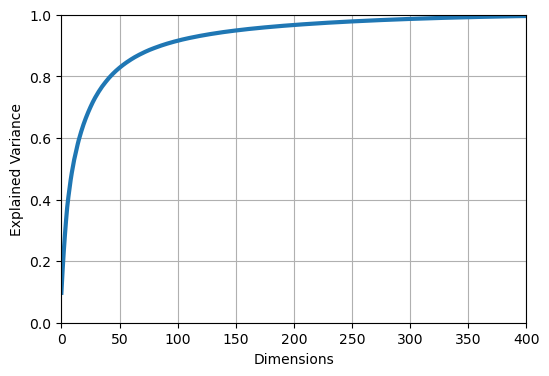

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                   RandomForestClassifier(random_state=42))

param_distrub = {
    'pca__n_components':np.arange(10,80),
    'randomforestclassifier__n_estimators':np.arange(50,500)
}

rnd_search = RandomizedSearchCV(clf,param_distrub,n_iter=10,cv = 3,random_state = 42)

In [20]:
rnd_search.fit(X_train[:1000],y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [21]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}

In [22]:
rnd_search.best_estimator_.fit(X_train[:1000],y_train[:1000])

Pipeline(steps=[('pca', PCA(n_components=23, random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=465, random_state=42))])

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state = 42),
                   SGDClassifier())
param_grid = {'pca__n_components':np.arange(10,80)}
grid_search = GridSearchCV(clf,param_grid,cv = 3)

In [24]:
grid_search.fit(X_train[:1000],y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [25]:
grid_search.best_params_

{'pca__n_components': 60}

In [26]:
grid_search.best_estimator_.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=60, random_state=42)),
                ('sgdclassifier', SGDClassifier())])

In [27]:
grid_search.best_estimator_.score(X_test,y_test)

0.884

# PCA for Compression

In [29]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train)

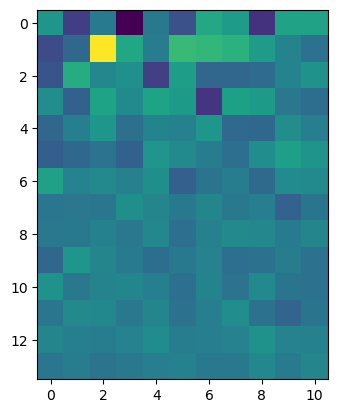

In [30]:
plt.imshow(X_reduced[0].reshape(14,11))

In [31]:
X_recovered = pca.inverse_transform(X_reduced)

In [32]:
X_recovered.shape

(60000, 784)

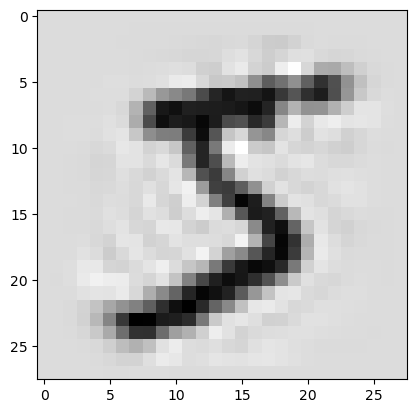

In [33]:
plt.imshow(X_recovered[0].reshape(28,28),cmap = 'binary')

In [34]:
# A = [3,5,2,8,66]

# for i,v in enumerate(A):
#     print(i,v)

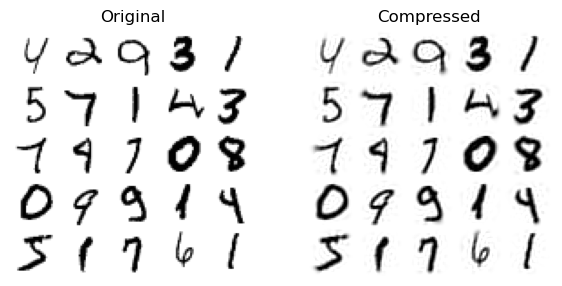

In [35]:
plt.figure(figsize = (7,4))

for idx,X in enumerate((X_train[::2100],X_recovered[::2100])):
    plt.subplot(1,2,idx+1)
    plt.title(['Original','Compressed'][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row*5+col].reshape(28,28),cmap = 'binary',vmin =0, vmax = 255,extent = (row,row+1,col,col+1))
            plt.axis([0,5,0,5])
            plt.axis('off')

In [36]:
# X_train[::2100].shape

In [37]:
from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components = 154)

n_batches = 100
for X_batch in np.array_split(X_train,n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [38]:
X_reduced.shape

(60000, 154)

# LLE(LocallyLinearEmbedding)

In [40]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss,t = make_swiss_roll(n_samples = 1000,noise = 0.2, random_state = 42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors = 10,random_state = 42)
X_unrolled = lle.fit_transform(X_swiss)

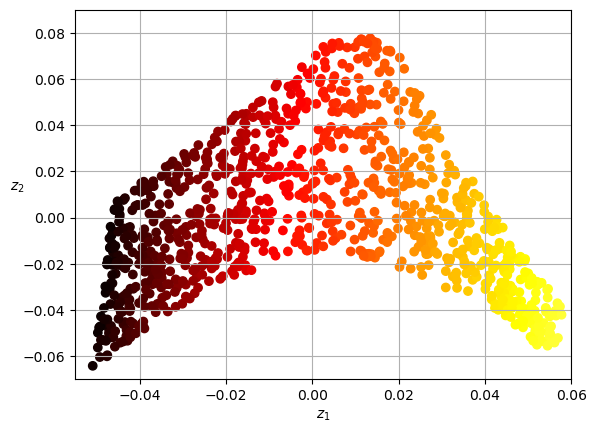

In [83]:
from matplotlib.colors import ListedColormap
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0,0.8,256)))
plt.scatter(X_unrolled[:,0],X_unrolled[:,1],c =t,cmap = darker_hot)

plt.xlabel('$z_1$')
plt.ylabel('$z_2$',rotation =0)
plt.axis([-0.055,0.06,-0.07,0.09])
plt.grid()

# Other Dimensionality Reduction Techniques

In [86]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, normalized_stress= False, random_state = 42)
X_reduced_mds = mds.fit_transform(X_swiss)

In [92]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components = 2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

In [96]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init ='random', learning_rate='auto',random_state = 42 )

In [98]:
X_samples,y_samples = X_train[:5000],y_train[:5000]

In [107]:
%time X_reduced_tsne = tsne.fit_transform(X_samples)

CPU times: total: 55.1 s
Wall time: 17.8 s


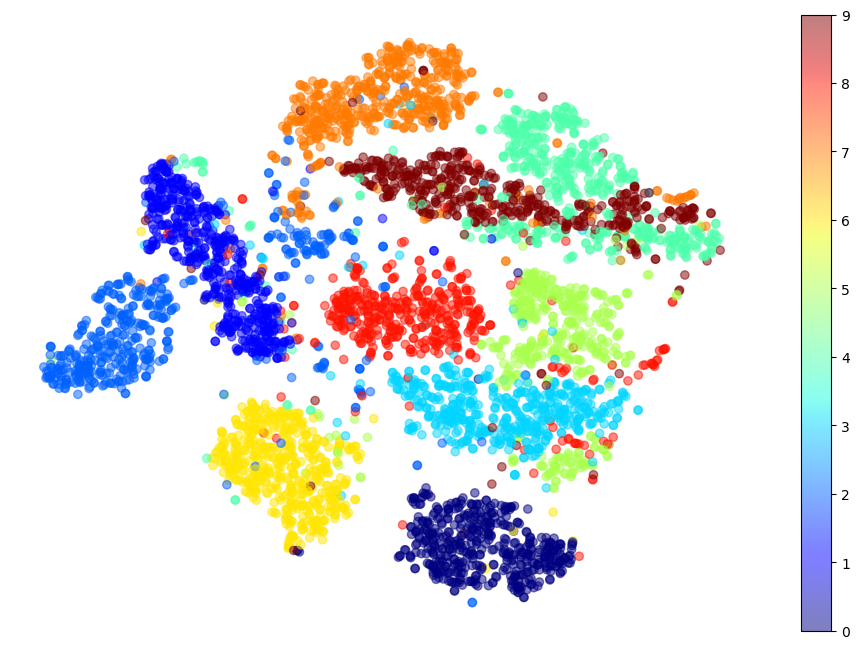

In [116]:
plt.figure(figsize = (12,8))
plt.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1], c = y_samples.astype(np.int8),cmap = 'jet',alpha = 0.5)
plt.axis('off')
plt.colorbar()
plt.show()